<a href="https://colab.research.google.com/github/DevLaukey/-Party_With_me/blob/main/MachineLearning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("/content/sample_data/used_cars.csv")

data.head()

data.tail()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [4]:
data.nunique()

data.isnull().sum()

(data.isnull().sum()/(len(data)))*100

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

In [5]:
data = data.drop(['S.No.'], axis = 1)


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [6]:
from datetime import date

date.today().year
data['Car_age']=date.today().year-data['Year']
data.head


<bound method NDFrame.head of                                                    Name    Location  Year  \
0                                Maruti Wagon R LXI CNG      Mumbai  2010   
1                      Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2                                          Honda Jazz V     Chennai  2011   
3                                     Maruti Ertiga VDI     Chennai  2012   
4                       Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
...                                                 ...         ...   ...   
7248                  Volkswagen Vento Diesel Trendline   Hyderabad  2011   
7249                             Volkswagen Polo GT TSI      Mumbai  2015   
7250                             Nissan Micra Diesel XV     Kolkata  2012   
7251                             Volkswagen Polo GT TSI        Pune  2013   
7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi  2014   

      Kilometers_Driven Fuel_Type Transmissio

In [8]:
data['Brand'] = data.Name.str.split().str.get(0)

data['Model'] = data.Name.str.split().str.get(1)  + data.Name.str.split().str.get(2)

data[['Name', 'Brand', 'Model']]

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta1.6
2,Honda Jazz V,Honda,JazzV
3,Maruti Ertiga VDI,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4New
...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Volkswagen,VentoDiesel
7249,Volkswagen Polo GT TSI,Volkswagen,PoloGT
7250,Nissan Micra Diesel XV,Nissan,MicraDiesel
7251,Volkswagen Polo GT TSI,Volkswagen,PoloGT


In [10]:
print(data.Brand.unique())
print(data.Brand.nunique())


searchfor = ['Isuzu', 'ISUZU', 'Mini', 'Land']

data[data.Brand.str.contains('|'.join(searchfor))].head(5)


data["Brand"].replace({"ISUZU":"Isuzu","Mini":"Mini Cooper", "Land": "Land Rover"}, inplace=True)

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']
33


In [11]:
data.describe().T

data.describe(include = 'all').T

cat_cols = data.select_dtypes(include=['object']).columns

num_cols = data.select_dtypes(include=np.number).columns.tolist()

print("Categorical Variables:")

print(cat_cols)

print("Numerical Variables:")

print(num_cols)

Categorical Variables:
Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'New_Price', 'Brand', 'Model'],
      dtype='object')
Numerical Variables:
['Year', 'Kilometers_Driven', 'Seats', 'Price', 'Car_age']


Year
Skew :  -0.84


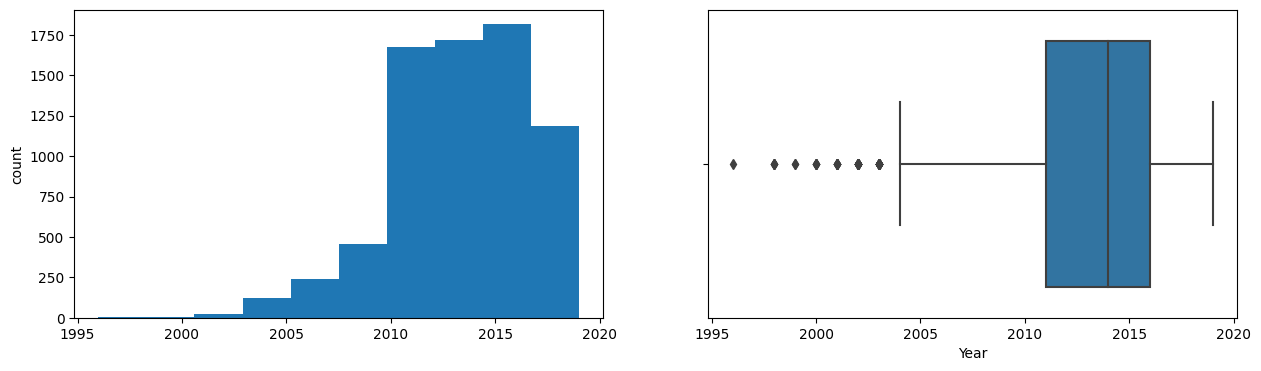

Kilometers_Driven
Skew :  61.58


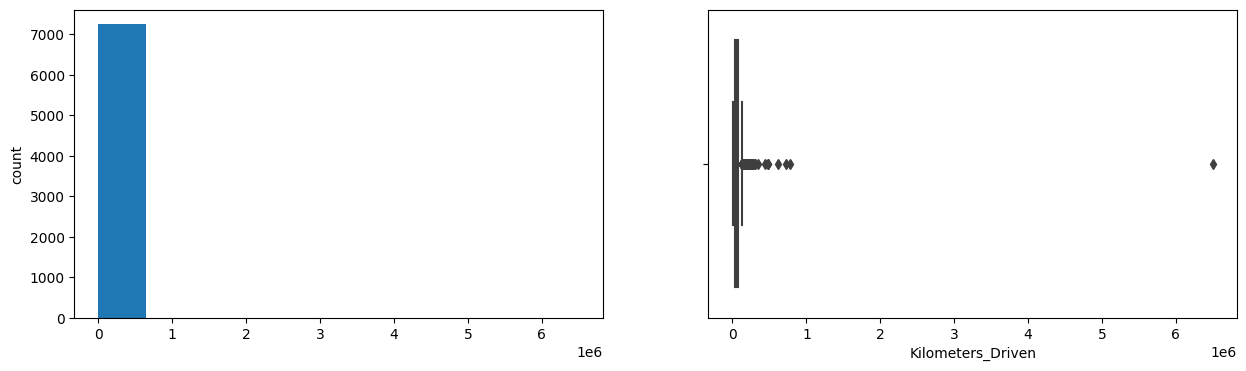

Seats
Skew :  1.9


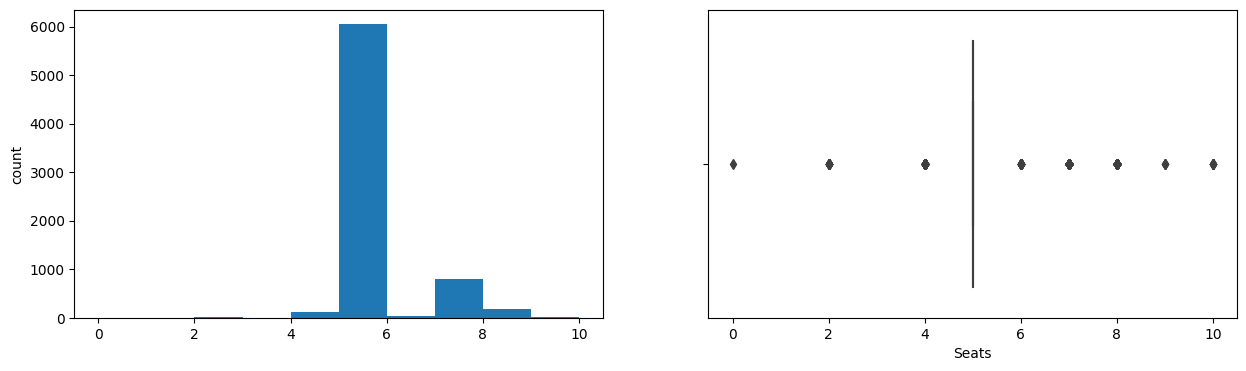

Price
Skew :  3.34


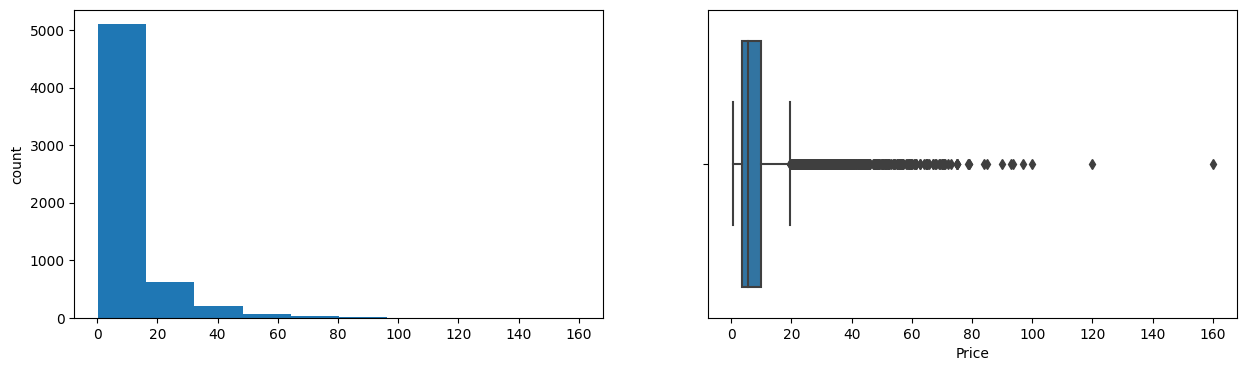

Car_age
Skew :  0.84


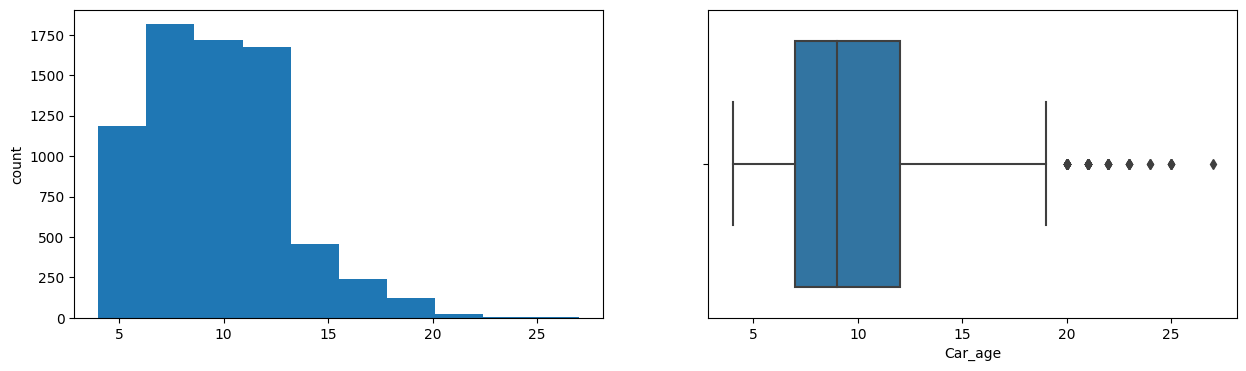

In [12]:
for col in num_cols:
  print(col)
  print('Skew : ', round(data[col].skew(), 2))
  plt.figure(figsize= (15, 4))
  plt.subplot(1,2,1)
  data[col].hist(grid=False)
  plt.ylabel('count')
  plt.subplot(1,2,2)
  sns.boxplot(x=data[col])
  plt.show()

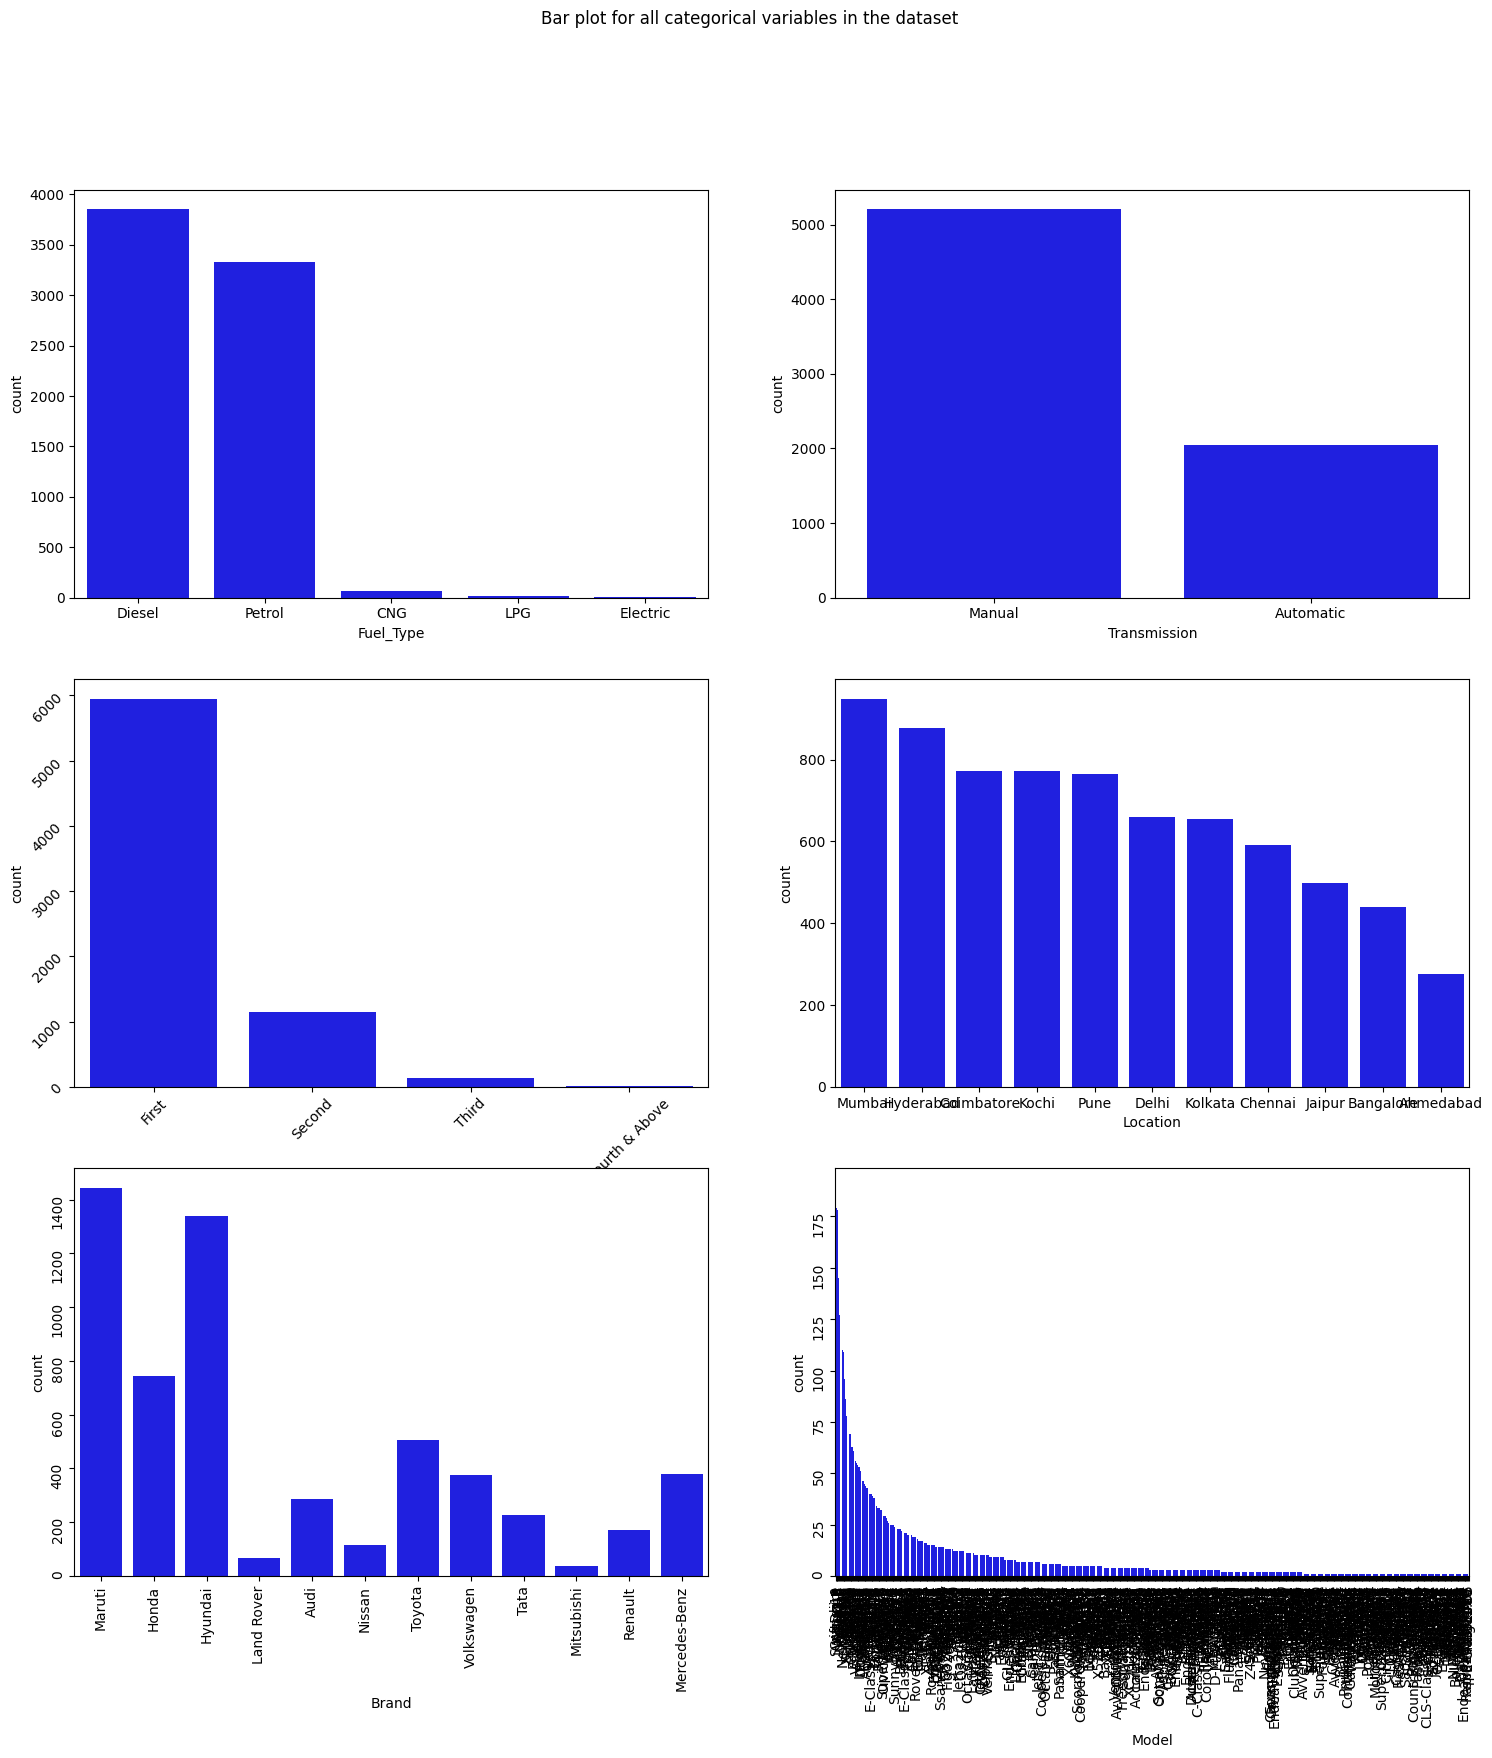

In [13]:
fig, axes = plt.subplots(3, 2, figsize=(18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')

sns.countplot(ax= axes[0,0], x = 'Fuel_Type', data = data, color = 'blue', order = data['Fuel_Type'].value_counts().index);

sns.countplot(ax = axes[0,1], x = 'Transmission', data= data, color = 'blue', order = data['Transmission'].value_counts().index);

sns.countplot(ax = axes[1,0], x = 'Owner_Type', data= data, color = 'blue', order = data['Owner_Type'].value_counts().index);

sns.countplot(ax = axes[1,1], x = 'Location', data= data, color = 'blue', order = data['Location'].value_counts().index);

sns.countplot(ax = axes[2,0], x = 'Brand', data= data, color = 'blue', order = data['Brand'].head(20).value_counts().index);

sns.countplot(ax = axes[2,1], x = 'Model', data= data, color = 'blue', order = data['Model'].value_counts().index);

axes[1][0].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation = 90);
axes[2][1].tick_params(labelrotation = 90);




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7253 non-null   object 
 1   Location               7253 non-null   object 
 2   Year                   7253 non-null   int64  
 3   Kilometers_Driven      7253 non-null   int64  
 4   Fuel_Type              7253 non-null   object 
 5   Transmission           7253 non-null   object 
 6   Owner_Type             7253 non-null   object 
 7   Mileage                7251 non-null   object 
 8   Engine                 7207 non-null   object 
 9   Power                  7207 non-null   object 
 10  Seats                  7200 non-null   float64
 11  New_Price              1006 non-null   object 
 12  Price                  6019 non-null   float64
 13  Car_age                7253 non-null   int64  
 14  Brand                  7253 non-null   object 
 15  Mode

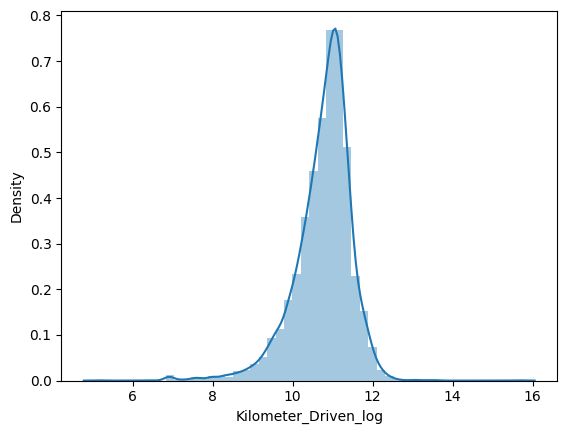

In [14]:
def log_transform(data, col):
  for colname in col:
    if(data[colname] == 1.0).all():
      data[colname + '_log'] = np.log(data[colname]+1)
    else:
      data[colname + '_log'] = np.log(data[colname])
  data.info()

log_transform(data, ['Kilometers_Driven', 'Price'])

#log transformation of 'Km driven'

sns.distplot(data['Kilometers_Driven_log'], axlabel = "Kilometer_Driven_log");

<Figure size 1300x1700 with 0 Axes>

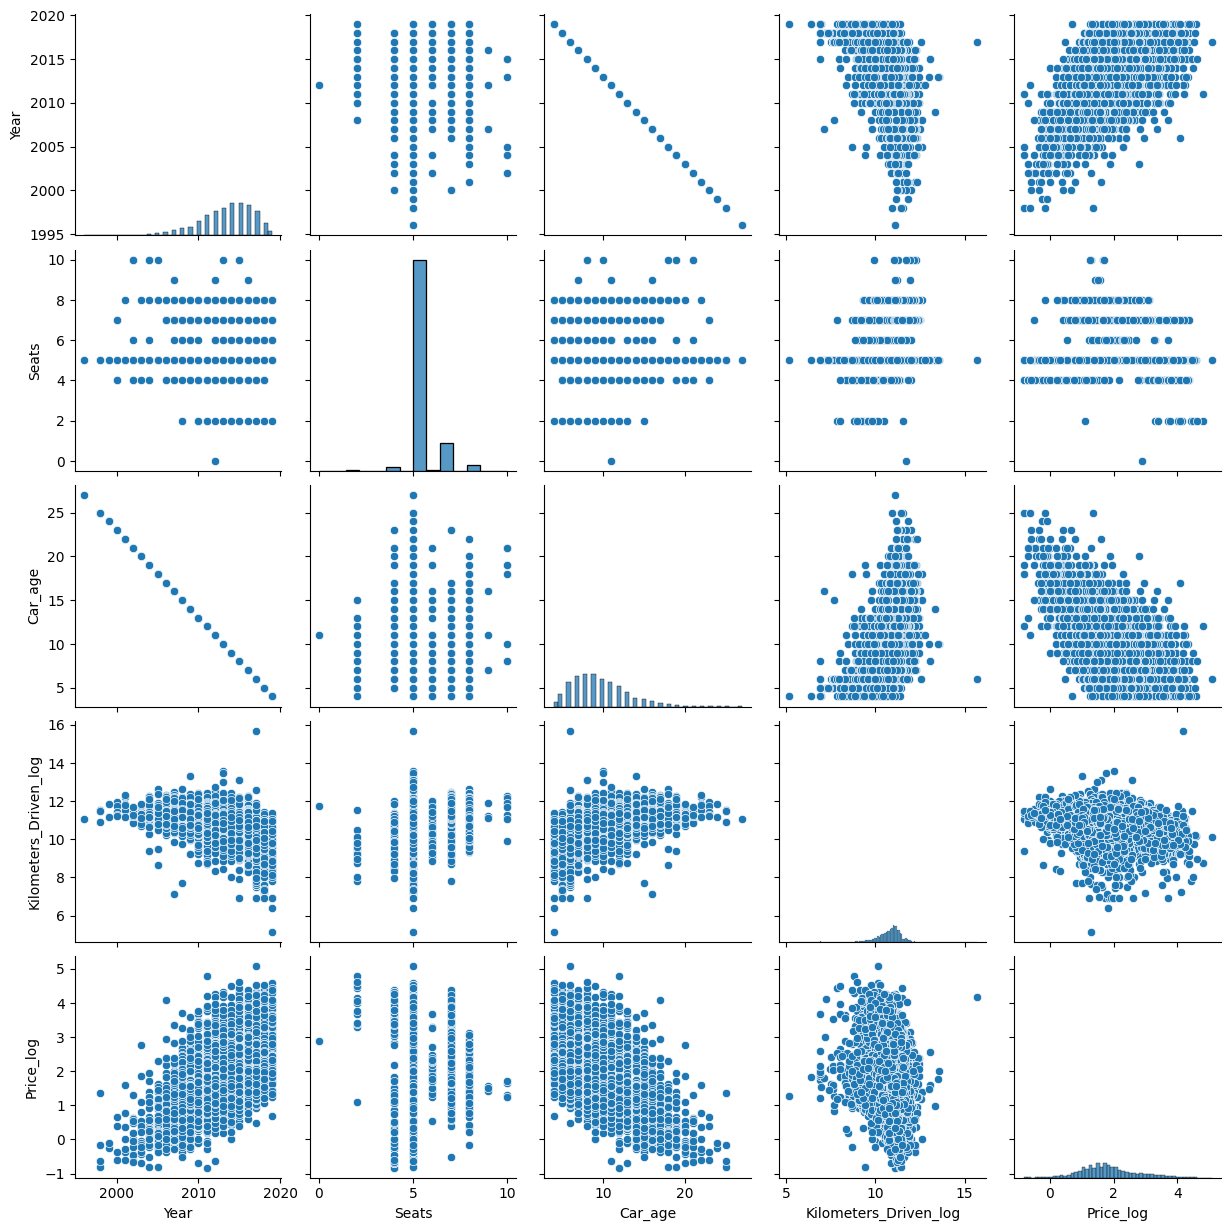

In [16]:
plt.figure(figsize=(13,17))

sns.pairplot(data=data.drop(['Kilometers_Driven', 'Price'], axis=1))

plt.show()

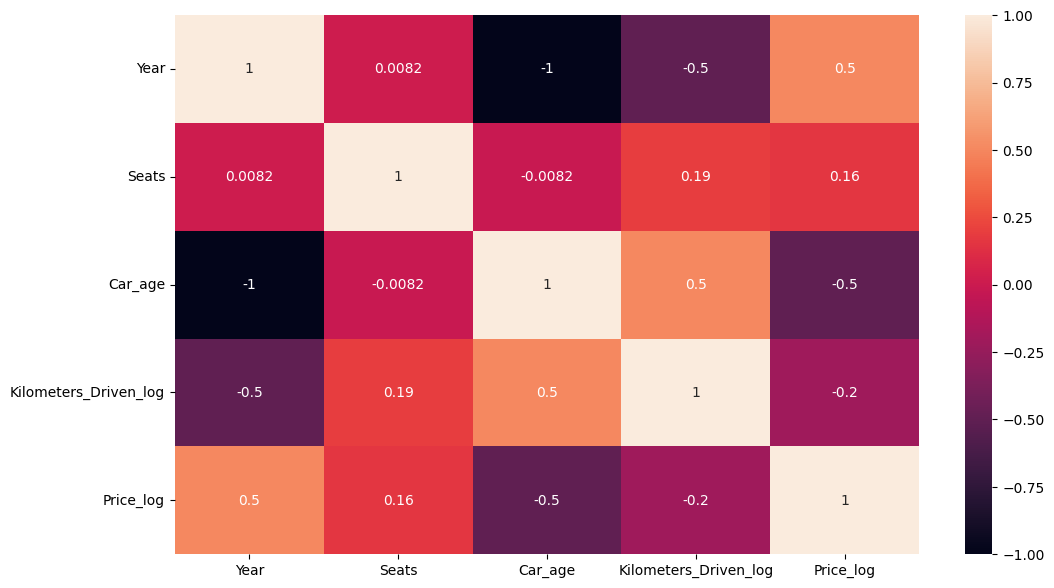

In [17]:
plt.figure(figsize=(12,7))

sns.heatmap(data.drop(['Kilometers_Driven', 'Price'], axis=1).corr(), annot = True, vmin = -1, vmax = 1)

plt.show()